# Case Study 1 : Collecting Data from Twitter

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/9/9f/Twitter_bird_logo_2012.svg/220px-Twitter_bird_logo_2012.svg.png">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    member 1: Mago Sheehy
    
    member 2: Brian Phillips
    
    ...

# Problem 1: Sampling Twitter Data with either Search or Streaming API about a certain topic

* Select a topic that you are interested in, for example, "WPI" or "Lady Gaga"
* Use Twitter API to sample a collection of tweets about this topic. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

Writing  400  tweets to 'dsdata.json...''
Writing complete, see dsdata.json for complete collection of tweets relating to 'pizza'
Number of retweets:  228
Number of unique users:  140
Average word count:  13.04
Average retweet count:  2262.6075
[('en', 212), ('ja', 40), ('es', 38), ('ko', 23), ('pt', 21), ('it', 12), ('th', 10), ('in', 7), ('tl', 6), ('de', 6), ('fr', 5), ('nl', 5), ('und', 4), ('tr', 4), ('sv', 2), ('zh', 2), ('ht', 1), ('pl', 1), ('et', 1)]


Text(0.5, 0, 'Language')

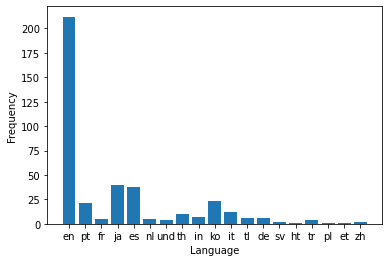

In [22]:
import twitter
import json
import matplotlib.pyplot as plt
from collections import Counter
from urllib.parse import unquote
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    
    CONSUMER_KEY = 'RB4hX8gjnUlPX4Ijvuj5gL9LT'
    CONSUMER_SECRET ='YovCvfis70dTuD1IuZMdHdhfiPPAr5nd22QkTIpnELq4r7Dw9j'
    OAUTH_TOKEN = '571213367-fyYadzmC7wGWOkM6OCF99ZevVjWGDC3fnO5OoYGr'
    OAUTH_TOKEN_SECRET = 'OjRD5By0qU0q3g9DJXCpMvnJrdYe1KIj2G2BoGtRng9q5'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

twitter_api = oauth_login()

#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#Finding 100 tweets that relate to 'pizza'
q = 'pizza'
count = 100
search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

# Iterating through 3 more batches of results by following the cursor
for _ in range(3):
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Write the tweets to a json file
print("Writing ", len(statuses), " tweets to \'dsdata.json...\''")
with open('dsdata.json', 'w') as file:
    json.dump(statuses, file)
print("Writing complete, see dsdata.json for complete collection of tweets relating to \'" + q + "\'")

#Calculating the number of tweets in the collection that are retweets
retweeted = 0
for status in statuses:
    if 'retweeted_status' in status.keys():
        retweeted += 1
print("Number of retweets: ", retweeted)

#Calculating the number of unique screen names
screen_names = [ user_mention['screen_name']
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]
print("Number of unique users: ", len(screen_names) - len(set(screen_names)))

#Calculating the average number of words per tweet
status_texts = [ status['text']
                 for status in statuses ]
total_words = sum([ len(s.split()) for s in status_texts ])
print("Average word count: ", total_words/len(statuses))

#Calculating the number of retweets each tweet has (or the number of retweets the origional copy of each retweeted post has)
status_retweets = [ status['retweet_count']
                 for status in statuses ]
print("Average retweet count: ", sum(status_retweets) / len(status_retweets))

#Caluclates which languages are present in the collection and how many tweets are in each language
status_language = [ status['lang']
                 for status in statuses ]
c = Counter(status_language)
print(c.most_common())

#Creates a bar plot of every language present in the collection along with its frequency
plt.bar(c.keys(), c.values())
plt.ylabel("Frequency")
plt.xlabel("Language")

### Report some statistics about the tweets you collected 

* The topic of interest: Pizza


* The total number of tweets collected:  400


* The total number of post that are retweets: 225


* The total number of unique users with tweets in the collection: 167


* The average number of words in each tweet: 14.58


* The average number of retweets: 2873.1325


* The number of Unique Languages: 18 (plus UND, which represents a tweet with an undetermined language

*-----------------------

# Problem 2: Analyzing Tweets and Tweet Entities with Frequency Analysis

**1. Word Count:** 
* Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 words with their counts

In [23]:
from prettytable import PrettyTable

#Creates a list where each element is a collection of every word in a given tweet
status_words = [ w
          for t in status_texts
              for w in t.split() ]

#Prints the results in a PrettyTable with two columns labeled 'Word' and 'Count', which record a 
#word and how many times it was used in the collection
pt = PrettyTable(field_names=['Word', 'Count'])
#Calculates the frequency of each word present in the list
c = Counter(status_words)
[ pt.add_row(kv) for kv in c.most_common()[:30] ]
pt.align['Word"'], pt.align['Count'] = 'l', 'r' # Set column alignment
print(pt)


+-------------------------+-------+
|           Word          | Count |
+-------------------------+-------+
|          pizza          |   235 |
|            RT           |   229 |
|           the           |    78 |
|            my           |    62 |
|            a            |    61 |
|           from          |    43 |
|       @craveries:       |    42 |
|          cheesy         |    42 |
| https://t.co/1KGNpsxzIT |    42 |
|            to           |    42 |
|            I            |    42 |
|           for           |    42 |
|           what          |    37 |
|          rolls          |    37 |
|           see           |    37 |
|            me           |    36 |
|          inside         |    36 |
|        microwave        |    36 |
|          Pizza          |    35 |
|      @RyanSchocket:     |    35 |
| https://t.co/GavZzw7cQR |    35 |
|           and           |    34 |
|            is           |    29 |
|            de           |    28 |
|           que           | 

**2. Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.


+-------+-----------------+----------------------------------------------------+
| Count | Screen Name     | Text                                               |
+-------+-----------------+----------------------------------------------------+
| 39283 | fifa_pizza      | RT @ere678: กี่รอบกุก็ขำ55555555555555555555555555     |
|       |                 | 55555555555555555555555555555555                   |
|       |                 | https://t.co/w0rZEKrANW                            |
| 27122 | Pizza_cpz       | RT @sleeplessbkk: สดๆ ร้อนๆ UN                      |
|       |                 | ออกแถลงการณ์แสดงความกังวลการใช้ ม 112 ในประเทศไทย     |
|       |                 | ที่ศาลสั่งจำคุกคนถึง 43 ปี ด้วยข้อหา 112                    |
|       |                 | https://t.co/p54a…                                 |
| 23381 | Pizza_cpz       | RT @psmark1821: พิซซ่ากดรี                            |
|       |                 | มาม่าเกาหลีกดเฟบ https://t.co/MDggLQ582j             |
| 2099

Text(0, 0.5, 'Tweets per Retweet range')

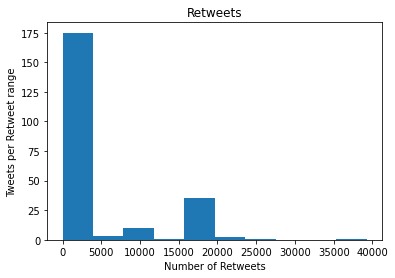

In [24]:
#Creates a list where each element is a tuple containing the retweet count, user screen name, 
#and text of each stored tweet if it has been retweeted
retweets = [
            (status['retweet_count'],
             status['user']['screen_name'],
             status['text'])

            # ... for each status...
            for status in statuses

            # ... so long as the status meets this condition
                if 'retweeted_status' in status.keys()
           ]
#Prints the results in a PrettyTable with three columns labeled 'Count', 'Screen Name', and 
#'Text' which record the number of retweets, the used who posted the tweet, and the text of 
#the tweet for the 10 most retweeted tweets
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

counts = [count for count, _, _ in retweets]

#prints a histogram of retweet number vs frequency
plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Number of Retweets')
plt.ylabel('Tweets per Retweet range')


**3. Find the most popular Tweet Entities in your collection of tweets**

Please plot a table of the top 10 hashtags, top 10 user mentions that are the most popular in your collection of tweets.

In [25]:
#Creates a list where each element is a list of hashtags present in a given tweet
hashtags = [ hashtag['text']
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

#Prints two pretty tables with different label names and datasets
for label, data in (('Screen Name', screen_names),
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count'])
    #calculates the most common hashtags and their counts or screen names and their 
    #counts depending on the state of the for-loop
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+----------------+-------+
| Screen Name    | Count |
+----------------+-------+
| craveries      |    42 |
| RyanSchocket   |    35 |
| ReeseW         |    13 |
| luisina_q      |    11 |
| akirosenthal   |     8 |
| desix_O825     |     6 |
| RubinaTM       |     6 |
| indiekiddvibes |     5 |
| sweet_isha1    |     3 |
| LOONYOSWORLDSG |     3 |
+----------------+-------+
+---------------------+-------+
| Hashtag             | Count |
+---------------------+-------+
| アキびゅーわーるど  |     6 |
| hodl                |     3 |
| 10AñosDePizzaGratis |     2 |
| VenetosPizza        |     1 |
| Venetos             |     1 |
| Pizza               |     1 |
| pizzalover          |     1 |
| 神プロ_レイド       |     1 |
| futureofwork        |     1 |
| robotics            |     1 |
+---------------------+-------+


# Problem 3: Getting "All" friends and "All" followers of a popular user in twitter


* choose a popular twitter user who has many followers, such as "ladygaga".
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [26]:
#Helper function to handle errors and rate-limiting that would otherwise interfere
#with runtime operations

from functools import partial
from sys import maxsize as maxint

import sys
import time
from urllib.error import URLError
from http.client import BadStatusLine
import json
import twitter

def make_twitter_request(twitter_api_func, max_errors=10, *args, **kw): 
    
    # A nested helper function that handles common HTTPErrors. Return an updated
    # value for wait_period if the problem is a 500 level error. Block until the
    # rate limit is reset if it's a rate limiting issue (429 error). Returns None
    # for 401 and 404 errors, which requires special handling by the caller.
    def handle_twitter_http_error(e, wait_period=2, sleep_when_rate_limited=True):
    
        if wait_period > 3600: # Seconds
            print('Too many retries. Quitting.', file=sys.stderr)
            raise e
    
        # See https://developer.twitter.com/en/docs/basics/response-codes
        # for common codes
    
        if e.e.code == 401:
            print('Encountered 401 Error (Not Authorized)', file=sys.stderr)
            return None
        elif e.e.code == 404:
            print('Encountered 404 Error (Not Found)', file=sys.stderr)
            return None
        elif e.e.code == 429: 
            print('Encountered 429 Error (Rate Limit Exceeded)', file=sys.stderr)
            if sleep_when_rate_limited:
                print("Retrying in 15 minutes...ZzZ...", file=sys.stderr)
                sys.stderr.flush()
                time.sleep(60*15 + 5)
                print('...ZzZ...Awake now and trying again.', file=sys.stderr)
                return 2
            else:
                raise e # Caller must handle the rate limiting issue
        elif e.e.code in (500, 502, 503, 504):
            print('Encountered {0} Error. Retrying in {1} seconds'\
                  .format(e.e.code, wait_period), file=sys.stderr)
            time.sleep(wait_period)
            wait_period *= 1.5
            return wait_period
        else:
            raise e

    # End of nested helper function
    
    wait_period = 2 
    error_count = 0 

    while True:
        try:
            return twitter_api_func(*args, **kw)
        except twitter.api.TwitterHTTPError as e:
            error_count = 0 
            wait_period = handle_twitter_http_error(e, wait_period)
            if wait_period is None:
                return
        except URLError as e:
            error_count += 1
            time.sleep(wait_period)
            wait_period *= 1.5
            print("URLError encountered. Continuing.", file=sys.stderr)
            if error_count > max_errors:
                print("Too many consecutive errors...bailing out.", file=sys.stderr)
                raise
        except BadStatusLine as e:
            error_count += 1
            time.sleep(wait_period)
            wait_period *= 1.5
            print("BadStatusLine encountered. Continuing.", file=sys.stderr)
            if error_count > max_errors:
                print("Too many consecutive errors...bailing out.", file=sys.stderr)
                raise

In [27]:
#Helper function that returns lists containing a specified number of follower ids and
#friend ids for a given user
def get_friends_followers_ids(twitter_api, screen_name=None, user_id=None,
                              friends_limit=maxint, followers_limit=maxint):
    
    get_friends_ids = partial(make_twitter_request, twitter_api.friends.ids, 
                              count=5000)
    get_followers_ids = partial(make_twitter_request, twitter_api.followers.ids, 
                                count=5000)

    friends_ids, followers_ids = [], []
    
    for twitter_api_func, limit, ids, label in [
                    [get_friends_ids, friends_limit, friends_ids, "friends"], 
                    [get_followers_ids, followers_limit, followers_ids, "followers"]
                ]:
        
        if limit == 0: continue
        
        cursor = -1
        while cursor != 0:
        
            # Use make_twitter_request via the partially bound callable...
            if screen_name: 
                response = twitter_api_func(screen_name=screen_name, cursor=cursor)
            else: # user_id
                response = twitter_api_func(user_id=user_id, cursor=cursor)

            if response is not None:
                ids += response['ids']
                cursor = response['next_cursor']
        
        
            # XXX: You may want to store data during each iteration to provide an 
            # an additional layer of protection from exceptional circumstances
        
            if len(ids) >= limit or response is None:
                break

    # Do something useful with the IDs, like store them to disk...
    return friends_ids[:friends_limit], followers_ids[:followers_limit]

In [28]:
twitter_api = oauth_login()

#Calls the get_friends_followers_ids helper function to find 20 friend ids and follower
#ids for the WPI_CDC account
q = "dominos"
limit = 20
friends_ids, followers_ids = get_friends_followers_ids(twitter_api, 
                                                       screen_name=q, 
                                                       friends_limit=limit, 
                                                       followers_limit=limit)

#Initializes lists that will store tuples of ids and screen names to help with PrettyTable formatting
friends = []
followers = []

#Loops through every id in the friends_ids and followers_ids lists and finds their corresponding user 
#screen names to be placed into their respective tuples
for i in range(limit):
    friends.append((friends_ids[i], make_twitter_request(twitter_api.users.lookup,user_id=friends_ids[i])[0]['screen_name']))
    followers.append((followers_ids[i], make_twitter_request(twitter_api.users.lookup,user_id=followers_ids[i])[0]['screen_name']))

#Prints two pretty tables with different label names and datasets
for label, data in (('Follower id', followers),
                    ('Friend id', friends)):
    pt = PrettyTable(field_names=[label, 'Screen Name'])
    [ pt.add_row(row) for row in data]
    pt.max_width['Text'] = 50
    pt.align= 'l'
    print(pt)

+---------------------+-----------------+
| Follower id         | Screen Name     |
+---------------------+-----------------+
| 1228471501088841730 | Dominik46666924 |
| 1897920805          | TheGoodBurger   |
| 1247599096841605122 | LetsTammt       |
| 993087762           | ItsCharmx       |
| 911976222590107653  | tsadu_usman     |
| 1356953109138968578 | falawla__       |
| 219908411           | ahm_atr         |
| 144134526           | JCordeiro97     |
| 1324425924696330240 | matas_walker    |
| 1358733597608300544 | AmitSin60523268 |
| 1149536264552615936 | weirdo_weirdly  |
| 1358414855615762435 | Christo44637822 |
| 1327344285696614400 | EilidhHussey    |
| 1282215990340665344 | daniel17872556  |
| 1333357368944455682 | NahidShormin    |
| 1358710709211701248 | Smelliest_rat   |
| 1075356778387263488 | AmandaMedusa23  |
| 513404520           | TheBunny06      |
| 1235107550896574465 | deery_nathan    |
| 1263655254031138816 | bennymcd7833    |
+---------------------+-----------

* Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table

In [30]:
twitter_api = oauth_login()

#Calls the get_friends_followers_ids helper function to find 300 friend ids and follower
#ids for the WPI_CDC account to get a sizeable collection of users
q = "WPI_CDC"
limit = 300
friends_ids, followers_ids = get_friends_followers_ids(twitter_api, 
                                                       screen_name=q, 
                                                       friends_limit=limit, 
                                                       followers_limit=limit)

#find the users that were found in both friend and follower searches by making the lists
#of ids into sets and keeping the intersection
intersection = list(set(friends_ids).intersection(set(followers_ids)))

#Loops through every id in the intersection and finds their corresponding user screen names
#to be placed into their respective tuples
merged = []
for i in range(len(intersection)):
    merged.append((intersection[i], make_twitter_request(twitter_api.users.lookup,user_id=intersection[i])[0]['screen_name']))

#Prints the results as a PrettyTable with two columns labeled 'Mutual Friend ID' and 'Screen
#Name' which record the id and name of mutual friends of the given user
pt = PrettyTable(field_names=['Mutual Friend ID', 'Screen Name'])
[ pt.add_row(row) for row in merged]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+---------------------+-----------------+
| Mutual Friend ID    | Screen Name     |
+---------------------+-----------------+
| 959132810501148672  | cpbl_wpi        |
| 1181747088188682240 | WPI_BME         |
| 1253393244521738242 | DEI_WPI         |
| 1188886738900602882 | HigherEdCarson  |
| 785927202           | JLSmith_25      |
| 1514062914          | CoachRobFB      |
| 2565359712          | WPI_OMA         |
| 120939749           | WPI_Robotics    |
| 2511299364          | HECCMA          |
| 514416615           | mer0213         |
| 833768942           | WPISTEMCenter   |
| 448065045           | TimberlineConst |
| 30463613            | FlavinHBS       |
+---------------------+-----------------+


*------------------------

# Problem 4: Business question 

Run some additional experiments with your data to gain familiarity with the twitter data and twitter API.

* Come up with a business question that Twitter data could help answer.
* Decribe the business case.
* How could Twitter data help a company decide how to spend its resources.

In [4]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#Start by expanding the number of tweets that we are looking at with 'pizza'
#Finding 100 tweets that relate to 'pizza'
q = 'pizza'
count = 100
search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

# Iterating through 10 more batches of results by following the cursor
for _ in range(10):
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']



#Look at the top words associated with pizza to find either competitor names or types of pizza
from prettytable import PrettyTable

#Creates a list where each element is a collection of every word in a given tweet
status_words = [ w
          for t in status_texts
              for w in t.split() ]

#Prints the results in a PrettyTable with two columns labeled 'Word' and 'Count', which record a 
#word and how many times it was used in the collection
pt = PrettyTable(field_names=['Word', 'Count'])
#Calculates the frequency of each word present in the list
c = Counter(status_words)
[ pt.add_row(kv) for kv in c.most_common()[:100] ]
pt.align['Word"'], pt.align['Count'] = 'l', 'r' # Set column alignment
print(pt)



+-------------------------+-------+
|           Word          | Count |
+-------------------------+-------+
|          pizza          |   211 |
|            RT           |   206 |
|           for           |    83 |
|           the           |    73 |
|          Pizza          |    62 |
|            a            |    57 |
|            to           |    55 |
|            my           |    51 |
|            I            |    47 |
|           and           |    44 |
|           from          |    34 |
|           see           |    33 |
|       @craveries:       |    32 |
|          cheesy         |    32 |
| https://t.co/1KGNpsxzIT |    32 |
|           what          |    32 |
|      @RyanSchocket:     |    31 |
|          rolls          |    31 |
|          inside         |    31 |
|        microwave        |    31 |
| https://t.co/GavZzw7cQR |    31 |
|            me           |    31 |
|            la           |    30 |
|            is           |    29 |
|           que           | 

Look at cheese pizza and see the number of tweets there are as well as how many of these are unique users as well as the topic of the most popular tweets

In [5]:
#Finding 100 tweets that relate to 'cheese pizza'
q = 'cheese pizza'
count = 100
search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

# Iterating through 20 more batches of results by following the cursor
for _ in range(20):
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

    
# Write the amount of overall tweets
print("Number of tweets: ", len(statuses))

#Calculating the number of unique screen names
screen_names = [ user_mention['screen_name']
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]
print("Number of unique users: ", len(screen_names) - len(set(screen_names)))



#Creates a list where each element is a tuple containing the retweet count, user screen name, 
#and text of each stored tweet if it has been retweeted
retweets = [
            (status['retweet_count'],
             status['user']['screen_name'],
             status['text'])

            # ... for each status...
            for status in statuses

            # ... so long as the status meets this condition
                if 'retweeted_status' in status.keys()
           ]
#Prints the results in a PrettyTable with three columns labeled 'Count', 'Screen Name', and 
#'Text' which record the number of retweets, the used who posted the tweet, and the text of 
#the tweet for the 10 most retweeted tweets
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

Number of tweets:  2094
Number of unique users:  1369
+-------+-----------------+----------------------------------------------------+
| Count | Screen Name     | Text                                               |
+-------+-----------------+----------------------------------------------------+
| 1486  | TMF_A_802W2     | RT @muni_gurume: 【GOOD CHEESE GOOD PIZZA】        |
|       |                 | @日比谷駅から徒歩2分                               |
|       |                 |                                                    |
|       |                 | フレッシュなチーズ料理をテイクアウトできるお店。   |
|       |                 |                                                    |
|       |                 | 店内にチーズ工房を併設しており、フレッシュなチーズを堪能できる！ |
|       |                 |                                                    |
|       |                 | 弾力あるモッツァレラ、とろとろクリームのブッラー…  |
| 1486  | Beee_367        | RT @muni_gurume: 【GOOD CHEESE GOOD PIZZA】        |
|       |                 | @日比谷駅から徒歩2分              

Look at pepperoni pizza and see the number of tweets there are as well as how many of these are unique users as well as the topic of the most popular tweets

In [6]:
#Finding 100 tweets that relate to 'pepporoni pizza'
q2 = 'pepperoni pizza'
count = 100
search_results = twitter_api.search.tweets(q=q2, count=count)
statuses = search_results['statuses']

# Iterating through 20 more batches of results by following the cursor
for _ in range(20):
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Write the amount of overall tweets
print("Number of tweets: ", len(statuses))

#Calculating the number of unique screen names
screen_names = [ user_mention['screen_name']
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]
print("Number of unique users: ", len(screen_names) - len(set(screen_names)))



#Creates a list where each element is a tuple containing the retweet count, user screen name, 
#and text of each stored tweet if it has been retweeted
retweets = [
            (status['retweet_count'],
             status['user']['screen_name'],
             status['text'])

            # ... for each status...
            for status in statuses

            # ... so long as the status meets this condition
                if 'retweeted_status' in status.keys()
           ]
#Prints the results in a PrettyTable with three columns labeled 'Count', 'Screen Name', and 
#'Text' which record the number of retweets, the used who posted the tweet, and the text of 
#the tweet for the 10 most retweeted tweets
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

Number of tweets:  2091
Number of unique users:  824
+-------+--------------+----------------------------------------------------+
| Count | Screen Name  | Text                                               |
+-------+--------------+----------------------------------------------------+
| 4346  | giftpy23     | RT @BUBBLETEAHOLIC: เซฮุนพูดอังกฤษ แฮร์สไตล์ลิสต์ก็ขำ      |
|       |              | How are you Cola coke yeahh thank you              |
|       |              | Chocolate icecream yeahh thank you                 |
|       |              | Pizza pepper…                                      |
| 4222  | eajjey       | RT @DAY6_BOBSUNGJIN: 뉴욕에 왔으니 피자를 먹어주는게 인지상정!!! 오늘은 |
|       |              | 페퍼로니 피자다아아아!!!!!                         |
|       |              | Eat the pizza at the NYC!!!                        |
|       |              | Today is pepperoni pizzaaaaaaaaa!!!!!              |
| 334   | statvexity   | RT @ncontextmukbang: Pepperoni pizza, buldak       |
|       |    

Look at veggie pizza and see the number of tweets there are as well as how many of these are unique users as well as the topic of the most popular tweets

In [7]:
#Finding 100 tweets that relate to 'veggie pizza'
q = 'veggie pizza'
count = 100
search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

# Iterating through 8 more batches of results by following the cursor
for _ in range(8):
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Write the amount of overall tweets
print("Number of tweets: ", len(statuses))

#Calculating the number of unique screen names
screen_names = [ user_mention['screen_name']
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]
print("Number of unique users: ", len(screen_names) - len(set(screen_names)))



#Creates a list where each element is a tuple containing the retweet count, user screen name, 
#and text of each stored tweet if it has been retweeted
retweets = [
            (status['retweet_count'],
             status['user']['screen_name'],
             status['text'])

            # ... for each status...
            for status in statuses

            # ... so long as the status meets this condition
                if 'retweeted_status' in status.keys()
           ]
#Prints the results in a PrettyTable with three columns labeled 'Count', 'Screen Name', and 
#'Text' which record the number of retweets, the used who posted the tweet, and the text of 
#the tweet for the 10 most retweeted tweets
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

Number of tweets:  729
Number of unique users:  139
+-------+--------------+----------------------------------------------------+
| Count | Screen Name  | Text                                               |
+-------+--------------+----------------------------------------------------+
| 4546  | Veggie_Pizza | RT @Izuku_shonen: Top 10 Anime betrayals           |
|       |              | https://t.co/Amew7XQ7WS                            |
| 811   | Pizza_Corpse | RT @budlight: Most important Super Bowl snack:     |
|       |              |                                                    |
|       |              | RT for beer                                        |
|       |              |                                                    |
|       |              | Like for wings                                     |
|       |              |                                                    |
|       |              | Reply "I'm no fun" for veggie trays                |
| 22    | so

Look at margherita pizza and see the number of tweets there are as well as how many of these are unique users as well as the topic of the most popular tweets

In [8]:
#Finding 100 tweets that relate to 'margherita pizza'
q = 'margherita pizza'
count = 100
search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

# Iterating through 9 more batches of results by following the cursor
for _ in range(9):
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Write the amount of overall tweets
print("Number of tweets: ", len(statuses))

#Calculating the number of unique screen names
screen_names = [ user_mention['screen_name']
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]
print("Number of unique users: ", len(screen_names) - len(set(screen_names)))



#Creates a list where each element is a tuple containing the retweet count, user screen name, 
#and text of each stored tweet if it has been retweeted
retweets = [
            (status['retweet_count'],
             status['user']['screen_name'],
             status['text'])

            # ... for each status...
            for status in statuses

            # ... so long as the status meets this condition
                if 'retweeted_status' in status.keys()
           ]
#Prints the results in a PrettyTable with three columns labeled 'Count', 'Screen Name', and 
#'Text' which record the number of retweets, the used who posted the tweet, and the text of 
#the tweet for the 10 most retweeted tweets
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

Number of tweets:  874
Number of unique users:  287
+-------+-----------------+----------------------------------------------------+
| Count | Screen Name     | Text                                               |
+-------+-----------------+----------------------------------------------------+
| 53    | tuturellafilho  | RT @skinnygirIeats: Tonight’s mood: Margherita     |
|       |                 | Pizza                                              |
|       |                 |                                                    |
|       |                 | 🍕🤠 https://t.co/yQ2HeGWzbC                       |
| 53    | thundadownunda0 | RT @skinnygirIeats: Tonight’s mood: Margherita     |
|       |                 | Pizza                                              |
|       |                 |                                                    |
|       |                 | 🍕🤠 https://t.co/yQ2HeGWzbC                       |
| 53    | takuya19910819  | RT @skinnygirIeats: Tonight’s moo

Look at meat pizza and see the number of tweets there are as well as how many of these are unique users as well as the topic of the most popular tweets

In [9]:
#Finding 100 tweets that relate to 'meat pizza'
q = 'meat pizza'
count = 100
search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

# Iterating through 20 more batches of results by following the cursor
for _ in range(20):
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Write the amount of overall tweets
print("Number of tweets: ", len(statuses))

#Calculating the number of unique screen names
screen_names = [ user_mention['screen_name']
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]
print("Number of unique users: ", len(screen_names) - len(set(screen_names)))



#Creates a list where each element is a tuple containing the retweet count, user screen name, 
#and text of each stored tweet if it has been retweeted
retweets = [
            (status['retweet_count'],
             status['user']['screen_name'],
             status['text'])

            # ... for each status...
            for status in statuses

            # ... so long as the status meets this condition
                if 'retweeted_status' in status.keys()
           ]
#Prints the results in a PrettyTable with three columns labeled 'Count', 'Screen Name', and 
#'Text' which record the number of retweets, the used who posted the tweet, and the text of 
#the tweet for the 10 most retweeted tweets
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

Number of tweets:  2081
Number of unique users:  927
+-------+---------------+----------------------------------------------------+
| Count | Screen Name   | Text                                               |
+-------+---------------+----------------------------------------------------+
| 1174  | RenA_QT       | RT @trinityfate62: This is nothing for Tori.       |
|       |               | Years of inhaling slices of triple meat supreme    |
|       |               | pizza have trained her for this moment             |
|       |               |                                                    |
|       |               | Even…                                              |
| 496   | Mojakija      | RT @thedocterswife: Pizza the baker อร่อยมากก       |
|       |               | กุ๊กเพิ่งเคยกินครั้งแรก ซื้อเซนลาดตรง tops                  |
|       |               | ชิ้นเบอเร่อแค่ 75฿/ชิ้น กุ๊กกินหน้า all meat ชีสเ…            |
| 429   | meat_vixen    | RT @Rekiowaa: Pizza maids? 🤍🎃  

Look at hawaiian pizza and see the number of tweets there are as well as how many of these are unique users as well as the topic of the most popular tweets

In [10]:
#Finding 100 tweets that relate to 'hawaiian pizza'
q = 'hawaiian pizza'
count = 100
search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

# Iterating through 20 more batches of results by following the cursor
for _ in range(20):
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Write the amount of overall tweets
print("Number of tweets: ", len(statuses))

#Calculating the number of unique screen names
screen_names = [ user_mention['screen_name']
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]
print("Number of unique users: ", len(screen_names) - len(set(screen_names)))



#Creates a list where each element is a tuple containing the retweet count, user screen name, 
#and text of each stored tweet if it has been retweeted
retweets = [
            (status['retweet_count'],
             status['user']['screen_name'],
             status['text'])

            # ... for each status...
            for status in statuses

            # ... so long as the status meets this condition
                if 'retweeted_status' in status.keys()
           ]
#Prints the results in a PrettyTable with three columns labeled 'Count', 'Screen Name', and 
#'Text' which record the number of retweets, the used who posted the tweet, and the text of 
#the tweet for the 10 most retweeted tweets
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

Number of tweets:  2100
Number of unique users:  1724
+-------+---------------+--------------------------------------------------+
| Count | Screen Name   | Text                                             |
+-------+---------------+--------------------------------------------------+
| 638   | phatfriday    | RT @TitaniaMcGrath: THINGS THAT ARE RACIST       |
|       |               | (part 30)                                        |
|       |               |                                                  |
|       |               | • Fried chicken                                  |
|       |               | • School uniforms                                |
|       |               | • Hawaiian pizza                                 |
|       |               | • Mozart https://t.co/HVZ2Vh4WBC                 |
| 638   | godfree_kd    | RT @TitaniaMcGrath: THINGS THAT ARE RACIST       |
|       |               | (part 30)                                        |
|       |             

Look at buffalo pizza and see the number of tweets there are as well as how many of these are unique users as well as the topic of the most popular tweets

In [11]:
#Finding 100 tweets that relate to 'buffalo pizza'
q = 'buffalo pizza'
count = 100
search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

# Iterating through 20 more batches of results by following the cursor
for _ in range(20):
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Write the amount of overall tweets
print("Number of tweets: ", len(statuses))

#Calculating the number of unique screen names
screen_names = [ user_mention['screen_name']
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]
print("Number of unique users: ", len(screen_names) - len(set(screen_names)))



#Creates a list where each element is a tuple containing the retweet count, user screen name, 
#and text of each stored tweet if it has been retweeted
retweets = [
            (status['retweet_count'],
             status['user']['screen_name'],
             status['text'])

            # ... for each status...
            for status in statuses

            # ... so long as the status meets this condition
                if 'retweeted_status' in status.keys()
           ]
#Prints the results in a PrettyTable with three columns labeled 'Count', 'Screen Name', and 
#'Text' which record the number of retweets, the used who posted the tweet, and the text of 
#the tweet for the 10 most retweeted tweets
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

Number of tweets:  1424
Number of unique users:  372
+-------+-----------------+----------------------------------------------------+
| Count | Screen Name     | Text                                               |
+-------+-----------------+----------------------------------------------------+
| 583   | j_brown24       | RT @stoolpresidente: In Honor of Bills Mafia Today |
|       |                 |                                                    |
|       |                 | Barstool Pizza Review - Pizza Pete (Buffalo)       |
|       |                 | https://t.co/ssrluQ16Rh                            |
| 332   | Buffalo_Wolf    | RT @Bease11: I think pineapple on pizza is 💯, but |
|       |                 | my buddy @Tua doesn’t agree. Help decide who’s     |
|       |                 | right by replying  🍍 or 🍕 for the chance t…      |
| 237   | Buffalo_Bill331 | RT @mostlyghostly16: Pizza Michael                 |
|       |                 | https://t.co/sMNtVpc7zu        

Look at bbq chicken pizza and see the number of tweets there are as well as how many of these are unique users as well as the topic of the most popular tweets

In [12]:
#Finding 100 tweets that relate to 'bbq chicken pizza'
q = 'bbq chicken pizza'
count = 100
search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

# Iterating through 20 more batches of results by following the cursor
for _ in range(20):
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Write the amount of overall tweets
print("Number of tweets: ", len(statuses))

#Calculating the number of unique screen names
screen_names = [ user_mention['screen_name']
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]
print("Number of unique users: ", len(screen_names) - len(set(screen_names)))



#Creates a list where each element is a tuple containing the retweet count, user screen name, 
#and text of each stored tweet if it has been retweeted
retweets = [
            (status['retweet_count'],
             status['user']['screen_name'],
             status['text'])

            # ... for each status...
            for status in statuses

            # ... so long as the status meets this condition
                if 'retweeted_status' in status.keys()
           ]
#Prints the results in a PrettyTable with three columns labeled 'Count', 'Screen Name', and 
#'Text' which record the number of retweets, the used who posted the tweet, and the text of 
#the tweet for the 10 most retweeted tweets
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:10] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

Number of tweets:  546
Number of unique users:  135
+-------+----------------+----------------------------------------------------+
| Count | Screen Name    | Text                                               |
+-------+----------------+----------------------------------------------------+
| 883   | xxxxwookat     | RT @ncontextmukbang: 1 kg cheese pizza with bbq    |
|       |                | chicken 🍕 https://t.co/a9haolXxV6                 |
| 883   | ddeungyooniee  | RT @ncontextmukbang: 1 kg cheese pizza with bbq    |
|       |                | chicken 🍕 https://t.co/a9haolXxV6                 |
| 630   | ReticentTurnip | RT @JoParkerBear: 7pm: think I'll do some reading  |
|       |                | then turn in early                                 |
|       |                | 2am: (drunk eating bbq chicken pizza) let's go to  |
|       |                | the fucken zoo. what…                              |
| 64    | zareenqistina2 | RT @FoodPornsx: BBQ Chicken Pizza Grilled C

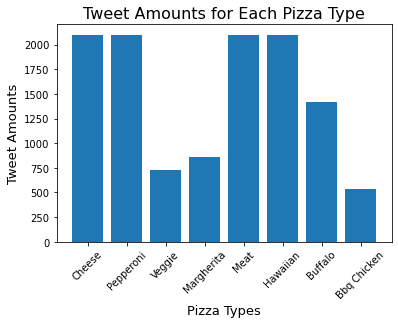

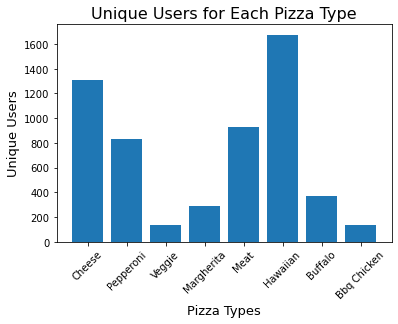

In [13]:
#Plot most popular types of pizza by number of tweets and unique users
#Pepperoni:
#   Tweets: 2100+
#   Unique users: 831
#Cheese:
#   Tweets: 2100+
#   Unique users: 1311
#Veggie:
#   Tweets: 726
#   Unique users: 137
#Margherita:
#   Tweets: 864
#   Unique users: 286
#Meat:
#   Tweets: 2100+
#   Unique users: 930
#Hawaiian:
#   Tweets: 2100+
#   Unique users: 1675
#Buffalo:
#   Tweets: 1422
#   Unique users: 371
#Bbq chicken:
#   Tweets: 539
#   Unique users: 132

import matplotlib.pyplot as plt

Pizza_types = ['Cheese', 'Pepperoni', 'Veggie', 'Margherita', 'Meat', 'Hawaiian', 'Buffalo', 'Bbq Chicken']
Tweet_amounts = [2100, 2100, 726, 864, 2100, 2100, 1422, 539]
Unique_amounts = [1311, 831, 137, 286, 930, 1675, 371, 132]

plt.bar(Pizza_types, Tweet_amounts)
plt.title('Tweet Amounts for Each Pizza Type', fontsize=16)
plt.xlabel('Pizza Types', fontsize=13)
plt.ylabel('Tweet Amounts', fontsize=13)
plt.xticks(rotation=45)
plt.show()


plt.bar(Pizza_types, Unique_amounts)
plt.title('Unique Users for Each Pizza Type', fontsize=16)
plt.xlabel('Pizza Types', fontsize=13)
plt.ylabel('Unique Users', fontsize=13)
plt.xticks(rotation=45)
plt.show()
